In [ ]:
#importing the important libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
# Load train and test data
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
#check the first 5 rows of the train data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#checking the columns of the train data
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#check the first 5 rows of the test data
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
#check columns of the test data
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
##Getting rid of the IDs but keeping the test IDs in a vector.
# Assuming your test_data is a pandas DataFrame
test_ids = test_data['Id']  # Extracting the 'Id' column to a separate vector
test_data = test_data.drop('Id', axis=1)  # Dropping the 'Id' column from the test_data

# Now test_data doesn't contain the 'Id' column, and test_ids contains the 'Id' values


In [ ]:
# Assuming your train_data is a pandas DataFrame
train_ids = train_data['Id']  # Extracting the 'Id' column to a separate vector
train_data = train_data.drop('Id', axis=1)  # Dropping the 'Id' column from the test_data

# Now train_data doesn't contain the 'Id' column, and train_ids contains the 'Id' values

In [ ]:
import numpy as np

# Create a new column 'SalePrice' in 'test' and assign NaN values
test_data['SalePrice'] = np.nan

# Concatenate 'train' and 'test' DataFrames
all_data = pd.concat([train_data, test_data], ignore_index=True)

# Check the dimensions of the combined DataFrame
print(all_data.shape)


(2919, 80)


Without the Id’s, the dataframe consists of 80 predictors and our response variable SalePrice

In [ ]:
all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

**Checking some of the most important variables**

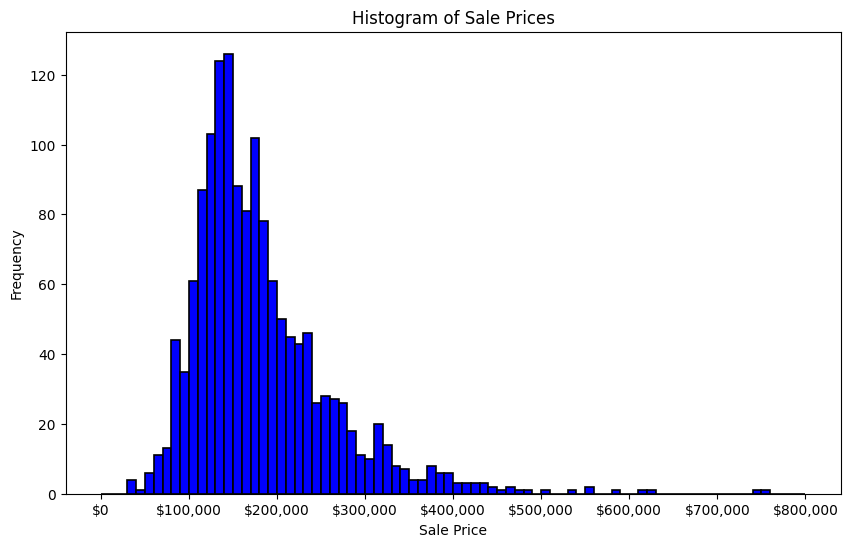

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Filter out rows where 'SalePrice' is not NA
filtered_data = all_data.dropna(subset=['SalePrice'])

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['SalePrice'], bins=range(0, 800001, 10000), color='blue', edgecolor='black', linewidth=1.2)

# Customize the x-axis
plt.xticks(range(0, 800001, 100000), labels=['${:,.0f}'.format(x) for x in range(0, 800001, 100000)])

# Add labels and title
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Prices')

# Show the plot
plt.show()


The sale prices are right skewed. Since few people can afford very expensive houses,this behaviour is expected.

In [ ]:
# Get summary statistics for the 'SalePrice' column
sale_price_summary = all_data['SalePrice'].describe()

# Display the summary
print(sale_price_summary)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


**Numeric predictors that are most important**

In [ ]:
# Get the numeric variables
numeric_vars = all_data.select_dtypes(include='number').columns

# Display the number of numeric variables
print(f'There are {len(numeric_vars)} numeric variables')

There are 37 numeric variables


In [ ]:
#Finding the correlation of all numeric variables
# Get the numeric variables
numeric_vars = all_data.select_dtypes(include='number')

# Calculate pairwise correlation
cor_num_vars = numeric_vars.corr(method='pearson')  # You can use 'spearman' for Spearman correlation

# Display the correlation matrix
print(cor_num_vars)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.417359 -0.201730     0.033638    -0.065625   
LotFrontage     -0.417359     1.000000  0.489896     0.217645    -0.075508   
LotArea         -0.201730     0.489896  1.000000     0.100541    -0.035617   
OverallQual      0.033638     0.217645  0.100541     1.000000    -0.093847   
OverallCond     -0.065625    -0.075508 -0.035617    -0.093847     1.000000   
YearBuilt        0.034409     0.122811  0.024128     0.597554    -0.368477   
YearRemodAdd     0.043315     0.091557  0.021612     0.571532     0.047654   
MasVnrArea       0.005433     0.221079  0.125596     0.432947    -0.136007   
BsmtFinSF1      -0.064311     0.219408  0.194031     0.281810    -0.050418   
BsmtFinSF2      -0.072530     0.047431  0.084059    -0.042771     0.041501   
BsmtUnfSF       -0.125994     0.113714  0.021362     0.275175    -0.138202   
TotalBsmtSF     -0.219965     0.354822  0.254138     0.549294   

10 numeric variables have a positive correlation of at least 0.5 with SalePrice.

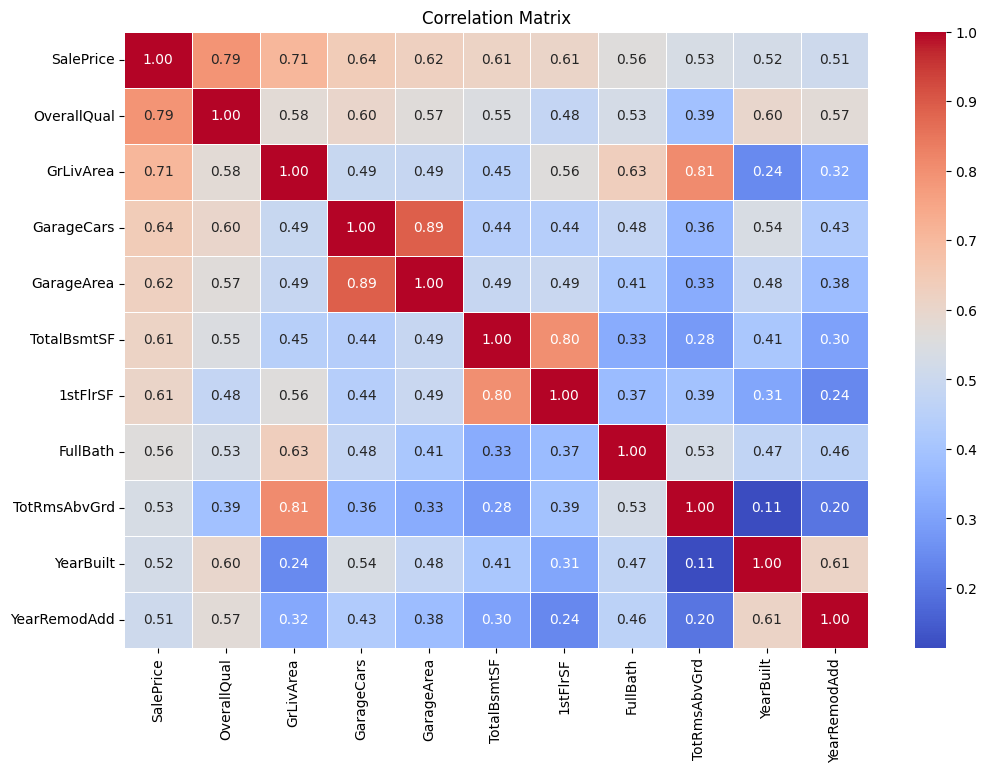

In [ ]:
import seaborn as sns
# Get the numeric variables
numeric_vars = all_data.select_dtypes(include='number')

# Calculate pairwise correlation
cor_num_vars = numeric_vars.corr(method='pearson')  # You can use 'spearman' for Spearman correlation

# Sort correlations with 'SalePrice' in decreasing order
cor_sorted = cor_num_vars['SalePrice'].sort_values(ascending=False)

# Select only high correlations
CorHigh = cor_sorted[abs(cor_sorted) > 0.5].index
cor_num_vars = cor_num_vars.loc[CorHigh, CorHigh]

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cor_num_vars, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation between GarageCars and GarageArea is very high (0.89), and both have similar (high) correlations with SalePrice. The other 6 six variables with a correlation higher than 0.5 with SalePrice are: -TotalBsmtSF: Total square feet of basement area -1stFlrSF: First Floor square feet -FullBath: Full bathrooms above grade -TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) -YearBuilt: Original construction date -YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

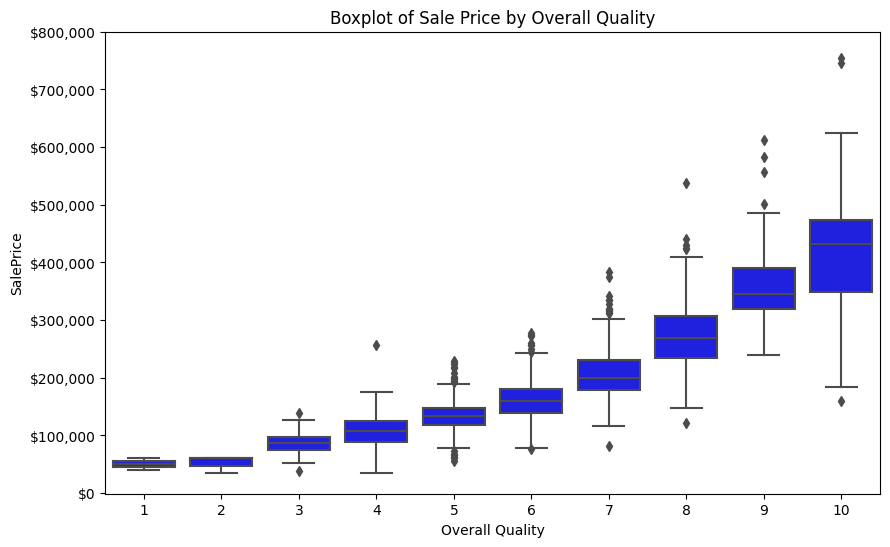

In [ ]:
#Filter out rows where 'SalePrice' is not NA
filtered_data = all_data.dropna(subset=['SalePrice'])

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=filtered_data, color='blue')

# Customize the x-axis
plt.xlabel('Overall Quality')

# Customize the y-axis
plt.yticks(range(0, 800001, 100000), labels=['${:,.0f}'.format(x) for x in range(0, 800001, 100000)])

# Add title
plt.title('Boxplot of Sale Price by Overall Quality')

# Show the plot
plt.show()

Overall Quality has the highest correlation with SalePrice among the numeric variables (0.79). It rates the overall material and finish of the house on a scale from 1 (very poor) to 10 (very excellent)
There is a positive correlation

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


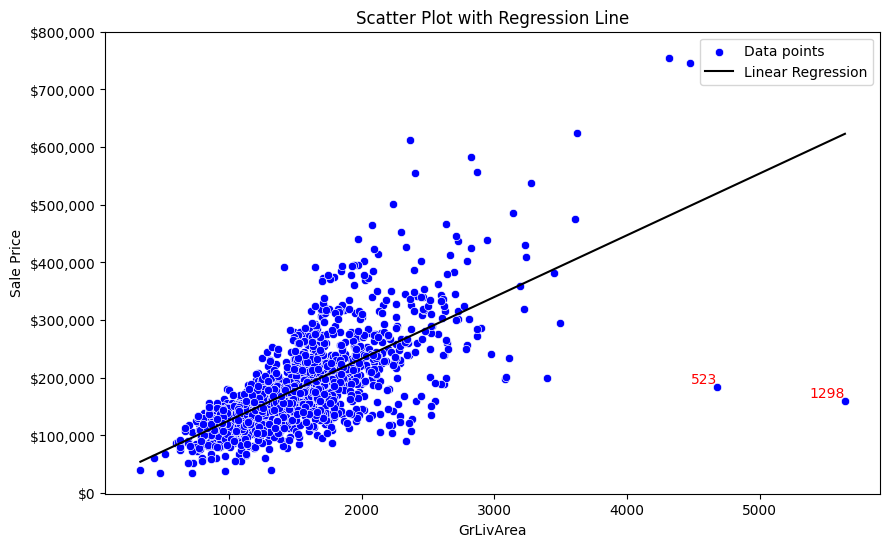

In [ ]:
#creating scatter plots of GrLivArea and SalePrice and adding regression lines
from sklearn.linear_model import LinearRegression


# Filter out rows where 'SalePrice' is not NA
filtered_data = all_data.dropna(subset=['SalePrice'])

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=filtered_data, color='blue', label='Data points')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(filtered_data[['GrLivArea']], filtered_data['SalePrice'])

# Plot the regression line
x_range = np.linspace(filtered_data['GrLivArea'].min(), filtered_data['GrLivArea'].max(), 100).reshape(-1, 1)
y_pred = lm.predict(x_range)
plt.plot(x_range, y_pred, color='black', label='Linear Regression')

# Customize the y-axis
plt.yticks(range(0, 800001, 100000), labels=['${:,.0f}'.format(x) for x in range(0, 800001, 100000)])

# Add labels and title
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.title('Scatter Plot with Regression Line')

# Add text labels for points with GrLivArea > 4500
high_area_points = filtered_data[filtered_data['GrLivArea'] > 4500]
for index, row in high_area_points.iterrows():
    plt.text(row['GrLivArea'], row['SalePrice'], str(index), ha='right', va='bottom', color='red')

# Show the plot
plt.legend()
plt.show()


Above Grade Living Area has the second highest correlation with SalePrice.

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Encoding categorical variables
filtered_data_encoded = pd.get_dummies(filtered_data, drop_first=True)
# Separating the target variable and features
X = filtered_data_encoded.drop(['SalePrice'], axis=1)  # Dropping 'Id' as it's not a feature
y = filtered_data_encoded['SalePrice']

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)

# Training the model
xg_reg.fit(X_train, y_train)

# Predicting on the validation set
y_pred = xg_reg.predict(X_val)

# Calculating the root mean squared error (RMSE)
rmse = mean_squared_error(y_val, y_pred, squared=False)
rmse


28133.837569394567

An RMSE of 28133.84 suggests that, on average, the predicted sale prices deviate from the actual prices by this amount.